In [ ]:
# Ad: Hilmi Tunahan
# Soyad: Başar
# Okul Numara: 2112721019
# GitHub Repo Bağlantısı: https://github.com/tunaBasar/MachineLearning.git

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os

2025-12-14 20:08:00.733658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
base_dir = 'dataset'

img_width, img_height = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print(f"Sınıflar: {train_generator.class_indices}")

Found 261 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Sınıflar: {'etiketli': 0, 'etiketsiz': 1}


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 2,097,922 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10


2025-12-12 15:04:57.840051: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 134217728 exceeds 10% of free system memory.
2025-12-12 15:04:57.875403: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 134217728 exceeds 10% of free system memory.
2025-12-12 15:04:58.067211: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 67108864 exceeds 10% of free system memory.
2025-12-12 15:04:58.147653: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 67108864 exceeds 10% of free system memory.


1/8 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.4375 - loss: 1.0855

2025-12-12 15:05:00.755159: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 134217728 exceeds 10% of free system memory.


8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.6070 - loss: 0.7241 - val_accuracy: 0.6250 - val_loss: 0.7053
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7500 - loss: 0.4731

/home/tuna/Desktop/HomeWorks/MachineLearning/venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 912ms/step - accuracy: 0.7500 - loss: 0.4731 - val_accuracy: 0.6250 - val_loss: 0.7617
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8122 - loss: 0.3964 - val_accuracy: 0.6094 - val_loss: 0.6445
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 895ms/step - accuracy: 0.8125 - loss: 0.2791 - val_accuracy: 0.6094 - val_loss: 0.6233
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9170 - loss: 0.2418 - val_accuracy: 0.6875 - val_loss: 0.6084
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 905ms/step - accuracy: 0.9688 - loss: 0.2214 - val_accuracy: 0.6094 - val_loss: 0.6200
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9651 - loss: 0.1705 - val_accuracy: 0.6094 - val_loss: 0.7842
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 857ms/step - accuracy: 0.9375 - loss: 0.1775 - val_accuracy: 0.6094 - val_loss: 0.7804
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9432 - loss: 0.1386 - val_accuracy: 0.5938 - val_loss: 0.7228
Epoch 10/10

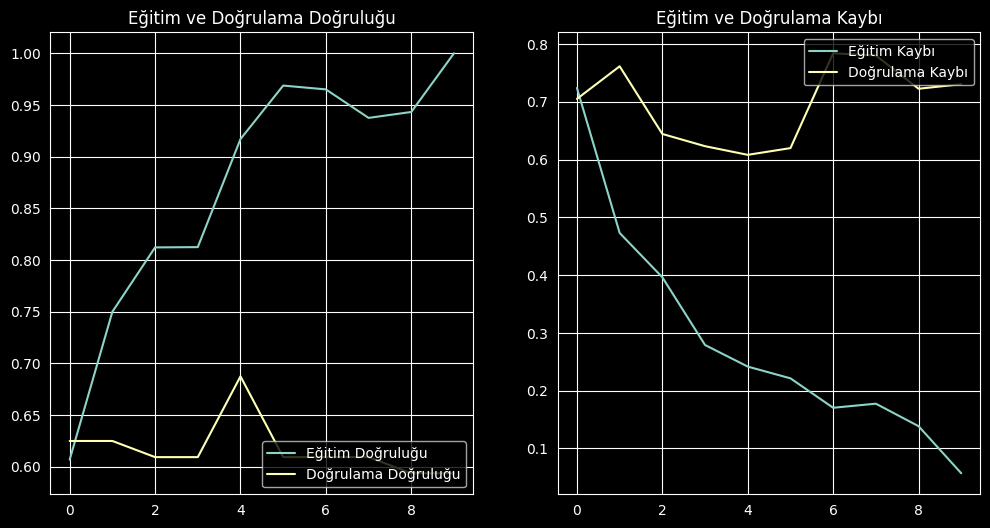

Son Eğitim Doğruluğu: %100.00
Son Doğrulama Doğruluğu: %59.38


In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')

plt.show()

print(f"Son Eğitim Doğruluğu: %{acc[-1]*100:.2f}")
print(f"Son Doğrulama Doğruluğu: %{val_acc[-1]*100:.2f}")